In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, concatenate, GlobalAveragePooling2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import keras.backend as K
import os
import numpy as np
import shutil
import tensorflow as tf
from tensorflow.keras.metrics import Metric

2023-12-14 08:32:56.603282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 08:32:57.422342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
!pip install numpy pandas matplotlib seaborn plotly requests tqdm opencv-python pillow wandb -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
import os
from sklearn.model_selection import train_test_split
import shutil
# 源数据集目录
data_dir = "data"
# 目标划分后的目录路径
train_dir = "path/to/train"
valid_dir = "path/to/validation"
test_dir = "path/to/test"
# 检查目标目录是否存在，如果不存在则创建
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(valid_dir):
    os.makedirs(valid_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)
# 获取数据集中所有图像的文件路径
image_files = []
for root, dirs, files in os.walk(data_dir):  # 遍历源数据集中的所有子目录和文件
    for file in files:
        image_files.append(os.path.join(root, file))
# 划分数据集
train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)  # 划分训练集和测试集
valid_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)  # 划分验证集和测试集
# 将文件移动到各自的目标目录中
for file in train_files:
    dest_file = os.path.join(train_dir, os.path.relpath(file, data_dir))
    os.makedirs(os.path.dirname(dest_file), exist_ok=True)  # 创建子目录
    shutil.copy(file, dest_file)
for file in valid_files:
    dest_file = os.path.join(valid_dir, os.path.relpath(file, data_dir))
    os.makedirs(os.path.dirname(dest_file), exist_ok=True)  # 创建子目录
    shutil.copy(file, dest_file)
for file in test_files:
    dest_file = os.path.join(test_dir, os.path.relpath(file, data_dir))
    os.makedirs(os.path.dirname(dest_file), exist_ok=True)  # 创建子目录
    shutil.copy(file, dest_file)




# train_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.25, 
#     fill_mode='nearest'
# )
# test_datagen = ImageDataGenerator(rescale=1.0/255)


# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(128, 128),
#     batch_size=64,
#     class_mode='categorical',
#     subset='training'  
# )

# validation_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(128, 128),
#     batch_size=64,
#     class_mode='categorical',
#     subset='validation' 
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(128, 128),
#     batch_size=64,
#     class_mode='categorical'
# )




In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 训练集数据增强
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 验证集和测试集不需要数据增强，只需要进行归一化
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 训练集数据增强
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 验证集和测试集不需要数据增强，只需要进行归一化
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# 训练集数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

# 验证集数据
validation_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=16,
    shuffle=False,
    class_mode='categorical'
    # subset='validation'  # Use 'validation' subset for validation data
)

# 测试集数据
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    shuffle=False,
    class_mode='categorical'
)


Found 3845 images belonging to 12 classes.
Found 824 images belonging to 12 classes.
Found 825 images belonging to 12 classes.


In [6]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [7]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate, GlobalAveragePooling2D, Reshape, Dense, multiply, add
# from tensorflow.keras.models import Model
# from tensorflow.keras import Input

# def squeeze_excite_block(input_tensor, ratio=16):
#     channels = input_tensor.shape[-1]

#     # Global average pooling
#     se = GlobalAveragePooling2D()(input_tensor)
    
#     # Squeeze operation
#     se = Dense(channels // ratio, activation='relu')(se)
    
#     # Excitation operation
#     se = Dense(channels, activation='sigmoid')(se)

#     # Reshape to (1, 1, channels)
#     se = Reshape((1, 1, channels))(se)

#     # Scale the input with the attention weights
#     scaled_input = multiply([input_tensor, se])

#     return scaled_input

# def inception_block_with_se(inputs, num_filters):
#     # 1x1卷积层
#     conv1x1 = Conv2D(num_filters, (1, 1), activation='relu')(inputs)
    
#     # 添加其他卷积层以提取更多特征
#     conv3x3_1 = Conv2D(num_filters, (1, 1), padding='same', activation='relu')(inputs)
#     conv3x3_2 = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(conv3x3_1)
    
#     conv5x5_1 = Conv2D(num_filters, (1, 1), padding='same', activation='relu')(inputs)
#     conv5x5_2 = Conv2D(num_filters, (5, 5), padding='same', activation='relu')(conv5x5_1)
    
#     # 最大池化层
#     maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inputs)
#     maxpool_conv1x1 = Conv2D(num_filters, (1, 1), padding='same', activation='relu')(maxpool)
    
#     # 拼接各个分支的输出
#     concatenated = concatenate([conv1x1, conv3x3_2, conv5x5_2, maxpool_conv1x1], axis=-1)
    
#     # Add SE attention mechanism
#     se_block = squeeze_excite_block(concatenated)
    
#     # Combine the original features with the attention-weighted features
#     output = add([concatenated, se_block])
    
#     return output


In [8]:
# input_shape = Input(shape=(128,128,3))

In [9]:
# x = Conv2D(128, (7,7), activation='relu')(input_shape)
# x = Conv2D(128, (3,3), activation='relu')(x)
# x = MaxPooling2D(2,2)(x)
# x = Conv2D(256, (3,3), activation='relu')(x)
# x = Conv2D(128, (1,1), activation='relu')(x)
# x = inception_block(x, 128)
# x = MaxPooling2D(2,2)(x)
# x = inception_block(x, 128)
# x = inception_block(x, 64)
# x = MaxPooling2D(2,2)(x)
# x = inception_block(x, 128)
# x = MaxPooling2D(2,2)(x)
# x = GlobalAveragePooling2D()(x)
# output = Dense(12, activation='softmax')(x)

In [10]:
# model_1 = Model(inputs=input_shape, outputs=output)


In [11]:
# model_1.summary()

In [12]:
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Reshape, Dense, BatchNormalization, Activation
# from tensorflow.keras.models import Model
# from tensorflow.keras import layers

# def squeeze_excite_block(input_tensor, ratio=16):
#     channels = input_tensor.shape[-1]

#     # Global average pooling
#     se = GlobalAveragePooling2D()(input_tensor)
    
#     # Squeeze operation
#     se = Dense(channels // ratio, activation='relu')(se)
    
#     # Excitation operation
#     se = Dense(channels, activation='sigmoid')(se)

#     # Reshape to (1, 1, channels)
#     se = Reshape((1, 1, channels))(se)

#     # Scale the input with the attention weights
#     scaled_input = layers.Multiply()([input_tensor, se])

#     return scaled_input

# def conv_block_with_se(inputs, filters, kernel_size=(3, 3), strides=(1, 1), use_batch_norm=True, activation='relu', ratio=16):
#     x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    
#     if use_batch_norm:
#         x = BatchNormalization()(x)
    
#     x = Activation(activation)(x)
    
#     # Add Squeeze-and-Excite block
#     x = squeeze_excite_block(x, ratio)

#     return x

# def create_se_cnn(input_shape, num_classes):
#     inputs = Input(shape=input_shape)

#     # Initial Convolutional Block
#     x = conv_block_with_se(inputs, 64)
#     x = conv_block_with_se(x, 64)
#     x = MaxPooling2D((2, 2))(x)

#     # Intermediate Convolutional Blocks
#     x = conv_block_with_se(x, 128)
#     x = conv_block_with_se(x, 128)
#     x = MaxPooling2D((2, 2))(x)

#     x = conv_block_with_se(x, 256)
#     x = conv_block_with_se(x, 256)
#     x = MaxPooling2D((2, 2))(x)

#     # Global Average Pooling and Dense Layer
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)

#     # Output layer
#     outputs = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs, outputs)
#     return model

# # Example usage
# input_shape = (128, 128, 3)  # Adjust input shape based on your requirements
# num_classes = 12  # Adjust the number of classes based on your task

# model = create_se_cnn(input_shape, num_classes)

# # Display the model summary
# model.summary()

In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Reshape, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

def squeeze_excite_block(input_tensor, ratio=16):
    channels = input_tensor.shape[-1]

    # Global average pooling
    se = GlobalAveragePooling2D()(input_tensor)
    
    # Squeeze operation
    se = Dense(channels // ratio, activation='relu')(se)
    
    # Excitation operation
    se = Dense(channels, activation='sigmoid')(se)

    # Reshape to (1, 1, channels)
    se = Reshape((1, 1, channels))(se)

    # Scale the input with the attention weights
    scaled_input = layers.Multiply()([input_tensor, se])

    return scaled_input

def conv_block_with_se(inputs, filters, kernel_size=(3, 3), strides=(1, 1), use_batch_norm=True, activation='relu', ratio=16):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    
    if use_batch_norm:
        x = BatchNormalization()(x)
    
    x = Activation(activation)(x)

    return x

def residual_block_with_se(inputs, filters, kernel_size=(3, 3), strides=(1, 1), use_batch_norm=True, activation='relu', ratio=16):
    # Shortcut
    shortcut = inputs
    
    # Main path
    x = conv_block_with_se(inputs, filters, kernel_size, strides, use_batch_norm, activation, ratio)
    x = conv_block_with_se(x, filters, kernel_size, use_batch_norm=use_batch_norm, activation=activation, ratio=ratio)
    
    # Adjust shortcut connection
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
    
    # Add shortcut to main path
    x = Add()([x, shortcut])
    
    # Apply Squeeze-and-Excite block
    x = squeeze_excite_block(x, ratio)
    
    return x

def create_se_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolutional Block
    x = conv_block_with_se(inputs, 64)
    x = conv_block_with_se(x, 64)
    x = MaxPooling2D((2, 2))(x)

    # Residual Block 1
    x = residual_block_with_se(x, 128)
    x = MaxPooling2D((2, 2))(x)

    # Residual Block 2
    x = residual_block_with_se(x, 256)
    x = MaxPooling2D((2, 2))(x)

    # Global Average Pooling and Dense Layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Example usage
input_shape = (128, 128, 3)  # Adjust input shape based on your requirements
num_classes = 12  # Adjust the number of classes based on your task

model = create_se_resnet(input_shape, num_classes)

# Display the model summary
model.summary()


2023-12-14 08:33:17.655263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-14 08:33:17.668507: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-14 08:33:17.668793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0

In [14]:
# Compile the model
from tensorflow.keras.optimizers import Adam

# 创建 Adam 优化器并设置学习率
custom_optimizer = Adam(learning_rate=0.0005)

# 编译模型
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100


2023-12-14 04:44:29.450211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-12-14 04:44:31.801074: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-14 04:44:32.206890: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1c7cc3d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-14 04:44:32.206927: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-12-14 04:44:32.245682: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-14 04:44:32.541845: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proce

241/241 [==============================] - 32s 82ms/step - loss: 2.4026 - accuracy: 0.1766 - val_loss: 2.5065 - val_accuracy: 0.1153
Epoch 2/100
241/241 [==============================] - 17s 70ms/step - loss: 2.2400 - accuracy: 0.2398 - val_loss: 2.3082 - val_accuracy: 0.2257
Epoch 3/100
241/241 [==============================] - 18s 73ms/step - loss: 2.1470 - accuracy: 0.2692 - val_loss: 2.1662 - val_accuracy: 0.3119
Epoch 4/100
241/241 [==============================] - 21s 85ms/step - loss: 2.1028 - accuracy: 0.2879 - val_loss: 2.2003 - val_accuracy: 0.2549
Epoch 5/100
241/241 [==============================] - 17s 69ms/step - loss: 2.0337 - accuracy: 0.3157 - val_loss: 2.2585 - val_accuracy: 0.2512
Epoch 6/100
241/241 [==============================] - 17s 69ms/step - loss: 1.9740 - accuracy: 0.3373 - val_loss: 2.3175 - val_accuracy: 0.2342
Epoch 7/100
241/241 [==============================] - 17s 69ms/step - loss: 1.9240 - accuracy: 0.3605 - val_loss: 2.3858 - val_accuracy: 0.23

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

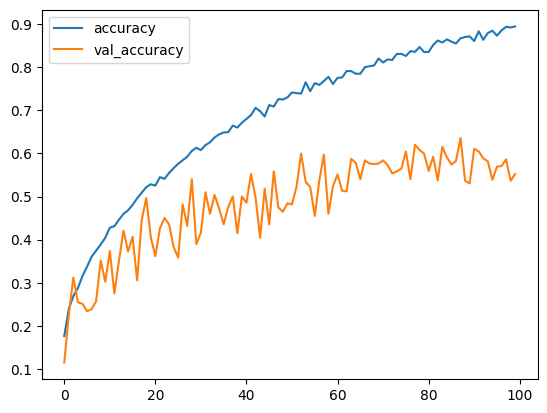

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

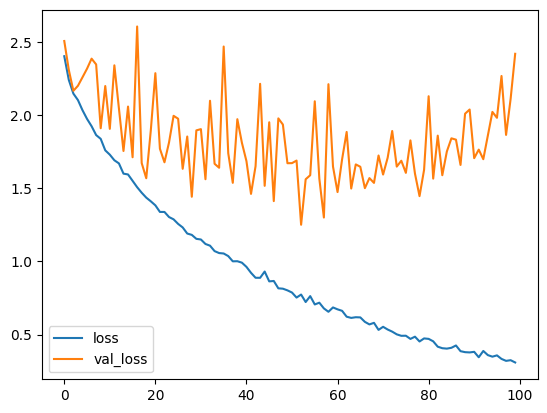

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [19]:
test_loss_ensemble, test_acc_ensemble = model.evaluate(test_generator)
print("model1 Test accuracy:", test_acc_ensemble)
print("model1 Test loss:", test_loss_ensemble)

52/52 [==============================] - 2s 29ms/step - loss: 2.2900 - accuracy: 0.5479
model1 Test accuracy: 0.5478788018226624
model1 Test loss: 2.2899882793426514


In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

# 收集测试数据的真实标签和预测值
test_steps = test_generator.n // test_generator.batch_size
y_true = []
y_pred = []

for _ in range(test_steps):
    x, y = test_generator.next()
    predictions = model.predict(x)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

# 生成混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 计算TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# 计算灵敏度和特异性
sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

1/1 [==============================] - 0s 27ms/step
Sensitivity: 1.0
Specificity: 1.0


52/52 [==============================] - 1s 20ms/step


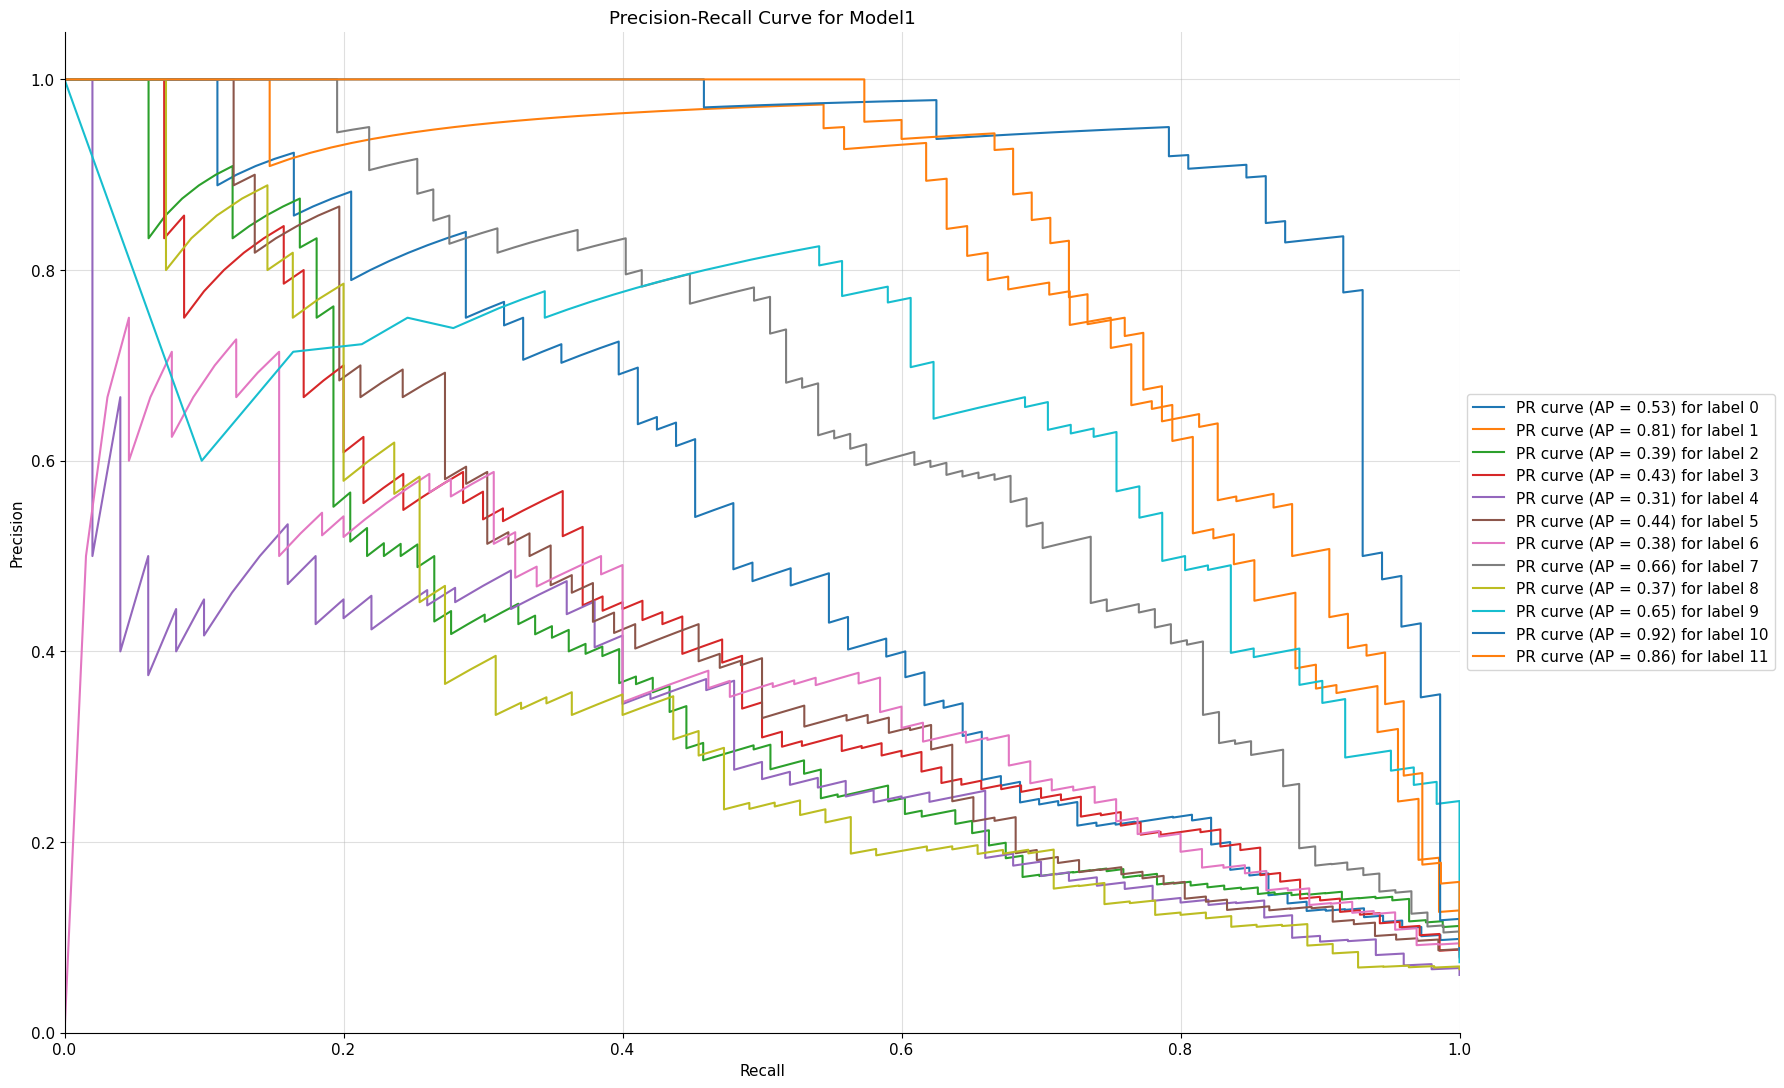

In [41]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(model, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

    # 初始化 Precision 和 Recall 字典
    precision = dict()
    recall = dict()
    average_precision = dict()

    # 计算每个类别的 Precision 和 Recall
    for i in range(12):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    # 绘制 Precision-Recall 曲线
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {model_name}')

    for i in range(12):
        ax.plot(recall[i], precision[i], label='PR curve (AP = %0.2f) for label %i' % (average_precision[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_precision_recall_curve(model, test_generator, 'Model1')

52/52 [==============================] - 1s 21ms/step


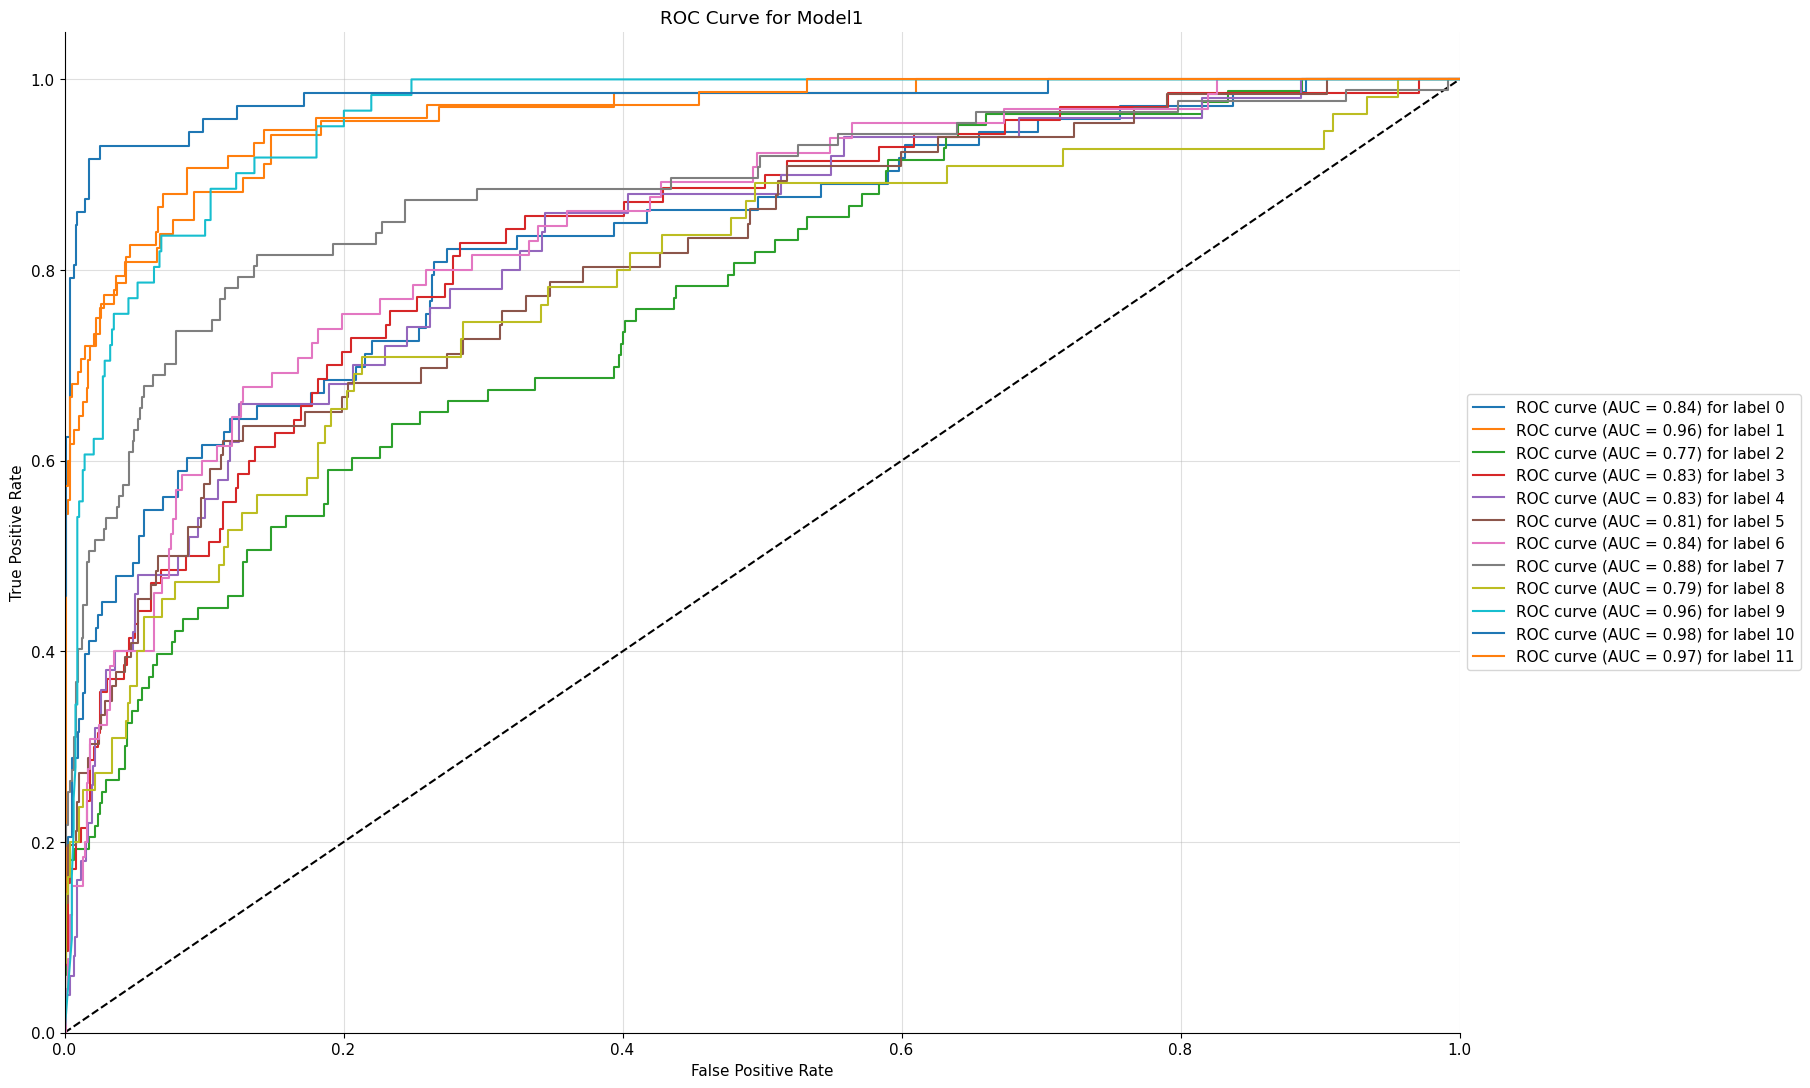

In [56]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(model, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

    # 计算每个类别的ROC曲线和AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(12):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 绘制ROC曲线
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')

    for i in range(12):
        ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_roc_curve(model, test_generator, 'Model1')

In [23]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(test_generator, model, prediction_data_gen):
    # 使用模型进行预测
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    
    # 获取预测类别
    preds = np.argmax(predictions, axis=1)
    
    # 获取真实标签
    labels = test_generator.classes
    
    # 获取类别名称
    names = np.array([i for i in validation_generator.class_indices.keys()])
    
    # 生成分类报告
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    
    # 将分类报告转换为DataFrame，并调整列名
    df = pd.DataFrame.from_dict(report_dict).transpose()
    
    return df

# 使用方式：
class_report(validation_generator, model, test_generator)

52/52 [==============================] - 1s 27ms/step


,precision,recall,f1-score,support
ants,0.860465,0.513889,0.643478,72.000000
bees,0.857143,0.454545,0.594059,66.000000
beetle,0.338983,0.312500,0.325203,64.000000
catterpillar,0.459459,0.298246,0.361702,57.000000
earthworms,0.696970,0.389831,0.500000,59.000000
earwig,0.457447,0.573333,0.508876,75.000000
grasshopper,0.467290,0.595238,0.523560,84.000000
moth,0.591549,0.538462,0.563758,78.000000
slug,0.227273,0.425532,0.296296,47.000000
snail,0.488189,0.861111,0.623116,72.000000


52/52 [==============================] - 1s 26ms/step


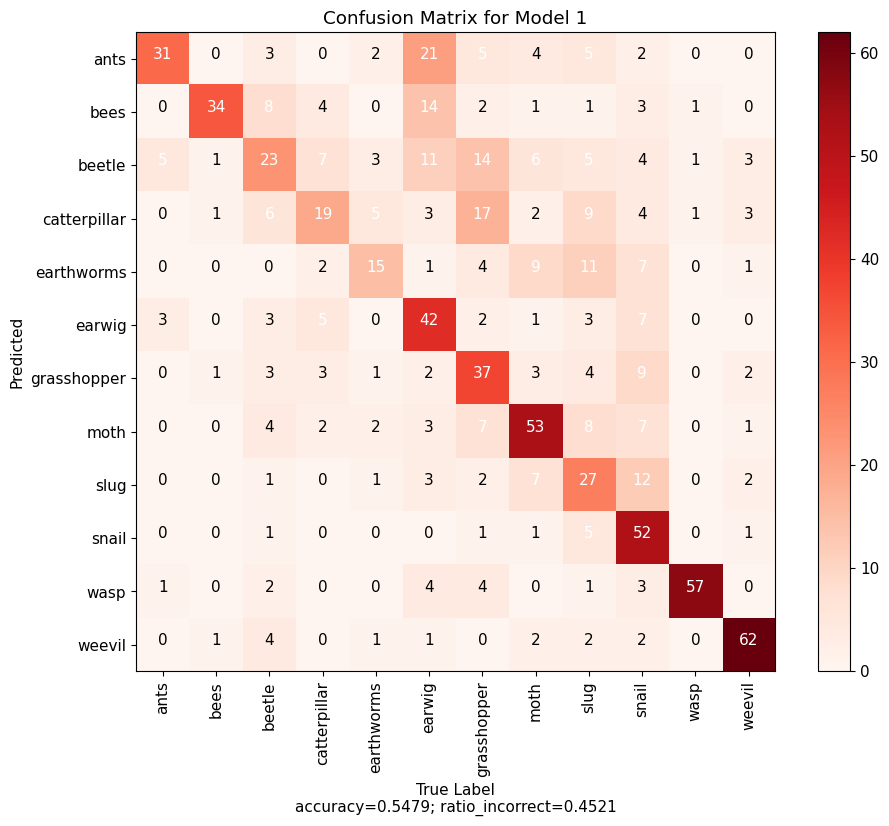

In [27]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(validation_generator, model, test_generator, model_name):
    plt.rcParams.update({'font.size': 11})
    
    # Use the correct number of steps for prediction
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    predictions = tf.nn.softmax(predictions, axis=1)
    
    # Get true labels with the correct number of samples
    true_labels = []
    num_steps = len(test_generator)
    for i in range(num_steps):
        _, labels = test_generator[i]
        true_labels.extend(np.argmax(labels, axis=1))

    # Ensure the lengths match
    assert len(true_labels) == len(preds), "Inconsistent number of samples in true labels and predictions."
    
    plot_labels = np.array([i for i in validation_generator.class_indices.keys()])
    
    cm = confusion_matrix(true_labels, preds)

    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')
    
    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')
    
    plt.tight_layout()
    plt.ylabel('Predicted')
    plt.xlabel('True Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))

# Usage
plot_confusion_matrix(validation_generator, model, test_generator, 'Model 1')

In [15]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization
from keras.layers import ReLU, Add, GlobalAveragePooling2D, Dense,MaxPooling2D

import tensorflow as tf
from tensorflow.keras import layers
# 定义SE注意力机制层
class SEBlock(layers.Layer):
    def __init__(self, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.reduction_ratio = reduction_ratio
    
    def build(self, input_shape):
        channels = input_shape[-1]
        self.squeeze = layers.GlobalAveragePooling2D()
        self.excitation = layers.Dense(channels // self.reduction_ratio, activation='relu')
        self.output_layer = layers.Dense(channels, activation='sigmoid')
    
    def call(self, inputs):
        x = self.squeeze(inputs)
        x = self.excitation(x)
        x = self.output_layer(x)
        x = tf.reshape(x, [-1, 1, 1, x.shape[-1]])
        return inputs * x
def create_model(input_shape, num_classes):
    # 输入层
    inputs = tf.keras.Input(shape=input_shape)
    
    # 卷积块1
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = SEBlock()(x)  # 使用SE注意力机制
    # 残差连接1
    residual = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.Add()([x, residual])
    x = layers.ReLU()(x)
    
    # 卷积块2
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = SEBlock()(x)  # 使用SE注意力机制
    # 残差连接2
    residual = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Add()([x, residual])
    x = layers.ReLU()(x)
    
    # 全局平均池化层
    x = layers.GlobalAveragePooling2D()(x)
    x = x = Dropout(0.5)(x)
    
    # 全连接层
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    
    # 创建模型
    model_2 = tf.keras.Model(inputs=inputs, outputs=x)
    return model_2
# 假设输入图像大小为 (128, 128, 3)，输出类别数为 12
input_shape = (128, 128, 3)
num_classes = 12
model_2 = create_model(input_shape, num_classes)
# 定义输出层
inputs = tf.keras.Input(shape=input_shape)  # 定义输入层
output = model_2(inputs)  # 定义输出层
# 编译模型
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 128, 128, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 conv2d_9 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d_8[0][0]']            
                                                                                                  
 se_block (SEBlock)          (None, 128, 128, 64)         580       ['conv2d_9[0][0]']            
                                                                                            

In [39]:
# Compile the model
from tensorflow.keras.optimizers import Adam

# 创建 Adam 优化器并设置学习率
custom_optimizer = Adam(learning_rate=0.001)

# 编译模型
model_2.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model_2.fit(train_generator, epochs=100, validation_data=validation_generator,verbose=2)

Epoch 1/100
241/241 - 26s - loss: 1.4785 - accuracy: 0.5066 - val_loss: 1.6891 - val_accuracy: 0.4381 - 26s/epoch - 109ms/step
Epoch 2/100
241/241 - 20s - loss: 1.4276 - accuracy: 0.5157 - val_loss: 1.6800 - val_accuracy: 0.4369 - 20s/epoch - 83ms/step
Epoch 3/100
241/241 - 20s - loss: 1.4475 - accuracy: 0.5129 - val_loss: 1.6444 - val_accuracy: 0.4539 - 20s/epoch - 85ms/step
Epoch 4/100
241/241 - 19s - loss: 1.4455 - accuracy: 0.5085 - val_loss: 1.6857 - val_accuracy: 0.4333 - 19s/epoch - 79ms/step
Epoch 5/100
241/241 - 20s - loss: 1.4586 - accuracy: 0.5014 - val_loss: 1.6391 - val_accuracy: 0.4612 - 20s/epoch - 82ms/step
Epoch 6/100
241/241 - 20s - loss: 1.3957 - accuracy: 0.5272 - val_loss: 1.6416 - val_accuracy: 0.4515 - 20s/epoch - 83ms/step
Epoch 7/100
241/241 - 20s - loss: 1.4103 - accuracy: 0.5202 - val_loss: 1.6077 - val_accuracy: 0.4684 - 20s/epoch - 81ms/step
Epoch 8/100
241/241 - 20s - loss: 1.4047 - accuracy: 0.5243 - val_loss: 1.6401 - val_accuracy: 0.4672 - 20s/epoch - 8

In [42]:
test_loss, test_acc = model_2.evaluate(test_generator)
print("Test accuracy:", test_acc)

52/52 [==============================] - 2s 33ms/step - loss: 1.7486 - accuracy: 0.5406
Test accuracy: 0.5406060814857483


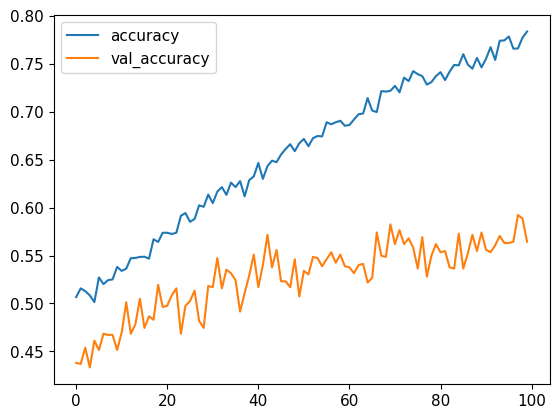

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

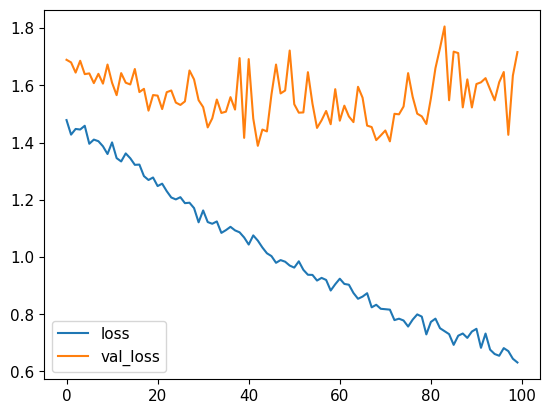

In [44]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [45]:
test_loss_ensemble, test_acc_ensemble = model_2.evaluate(test_generator)
print("model2 Test accuracy:", test_acc_ensemble)
print("model2 Test loss:", test_loss_ensemble)

52/52 [==============================] - 2s 31ms/step - loss: 1.7486 - accuracy: 0.5406
model2 Test accuracy: 0.5406060814857483
model2 Test loss: 1.7485963106155396


In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np

# 收集测试数据的真实标签和预测值
test_steps = test_generator.n // test_generator.batch_size
y_true = []
y_pred = []

for _ in range(test_steps):
    x, y = test_generator.next()
    predictions = model.predict(x)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

# 生成混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 计算TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# 计算灵敏度和特异性
sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

1/1 [==============================] - 0s 21ms/step
Sensitivity: 0.9787234042553191
Specificity: 0.8666666666666667


52/52 [==============================] - 2s 26ms/step


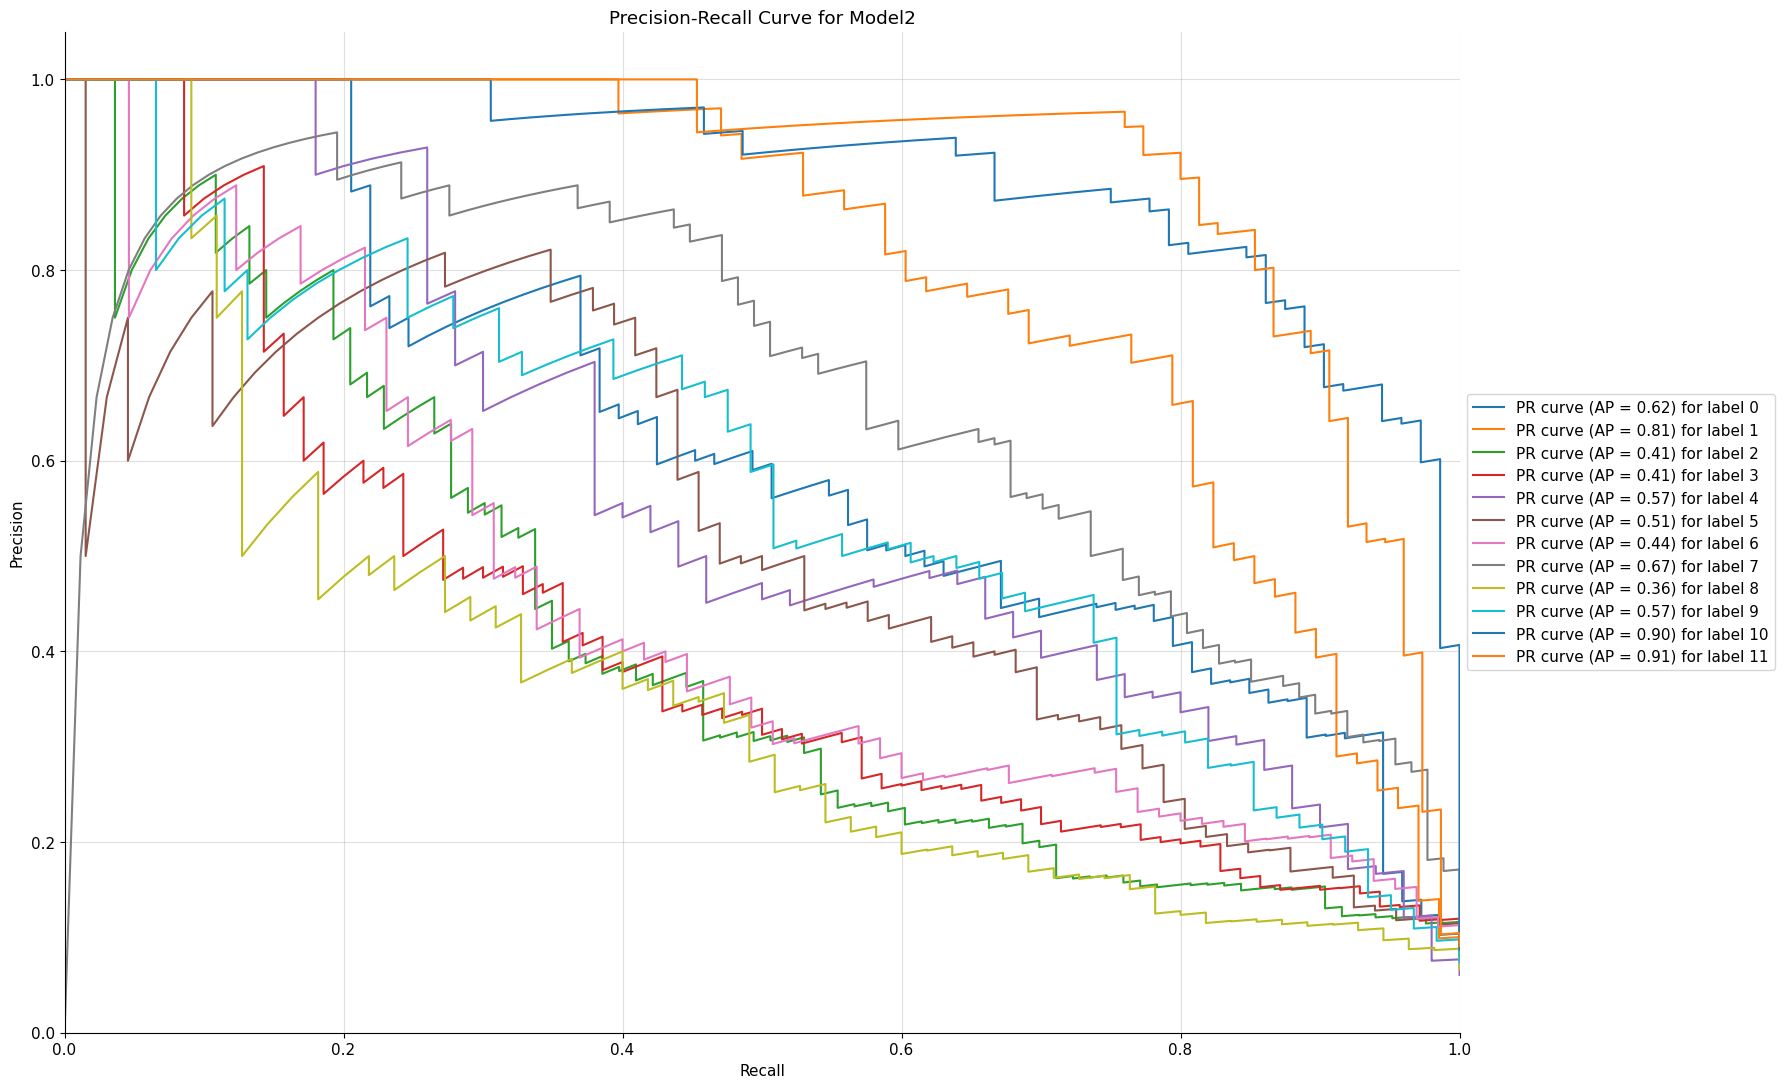

In [47]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(model_2, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = model_2.predict(test_generator, steps=len(test_generator), verbose=1)

    # 初始化 Precision 和 Recall 字典
    precision = dict()
    recall = dict()
    average_precision = dict()

    # 计算每个类别的 Precision 和 Recall
    for i in range(12):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    # 绘制 Precision-Recall 曲线
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {model_name}')

    for i in range(12):
        ax.plot(recall[i], precision[i], label='PR curve (AP = %0.2f) for label %i' % (average_precision[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_precision_recall_curve(model_2, test_generator, 'Model2')

52/52 [==============================] - 1s 26ms/step


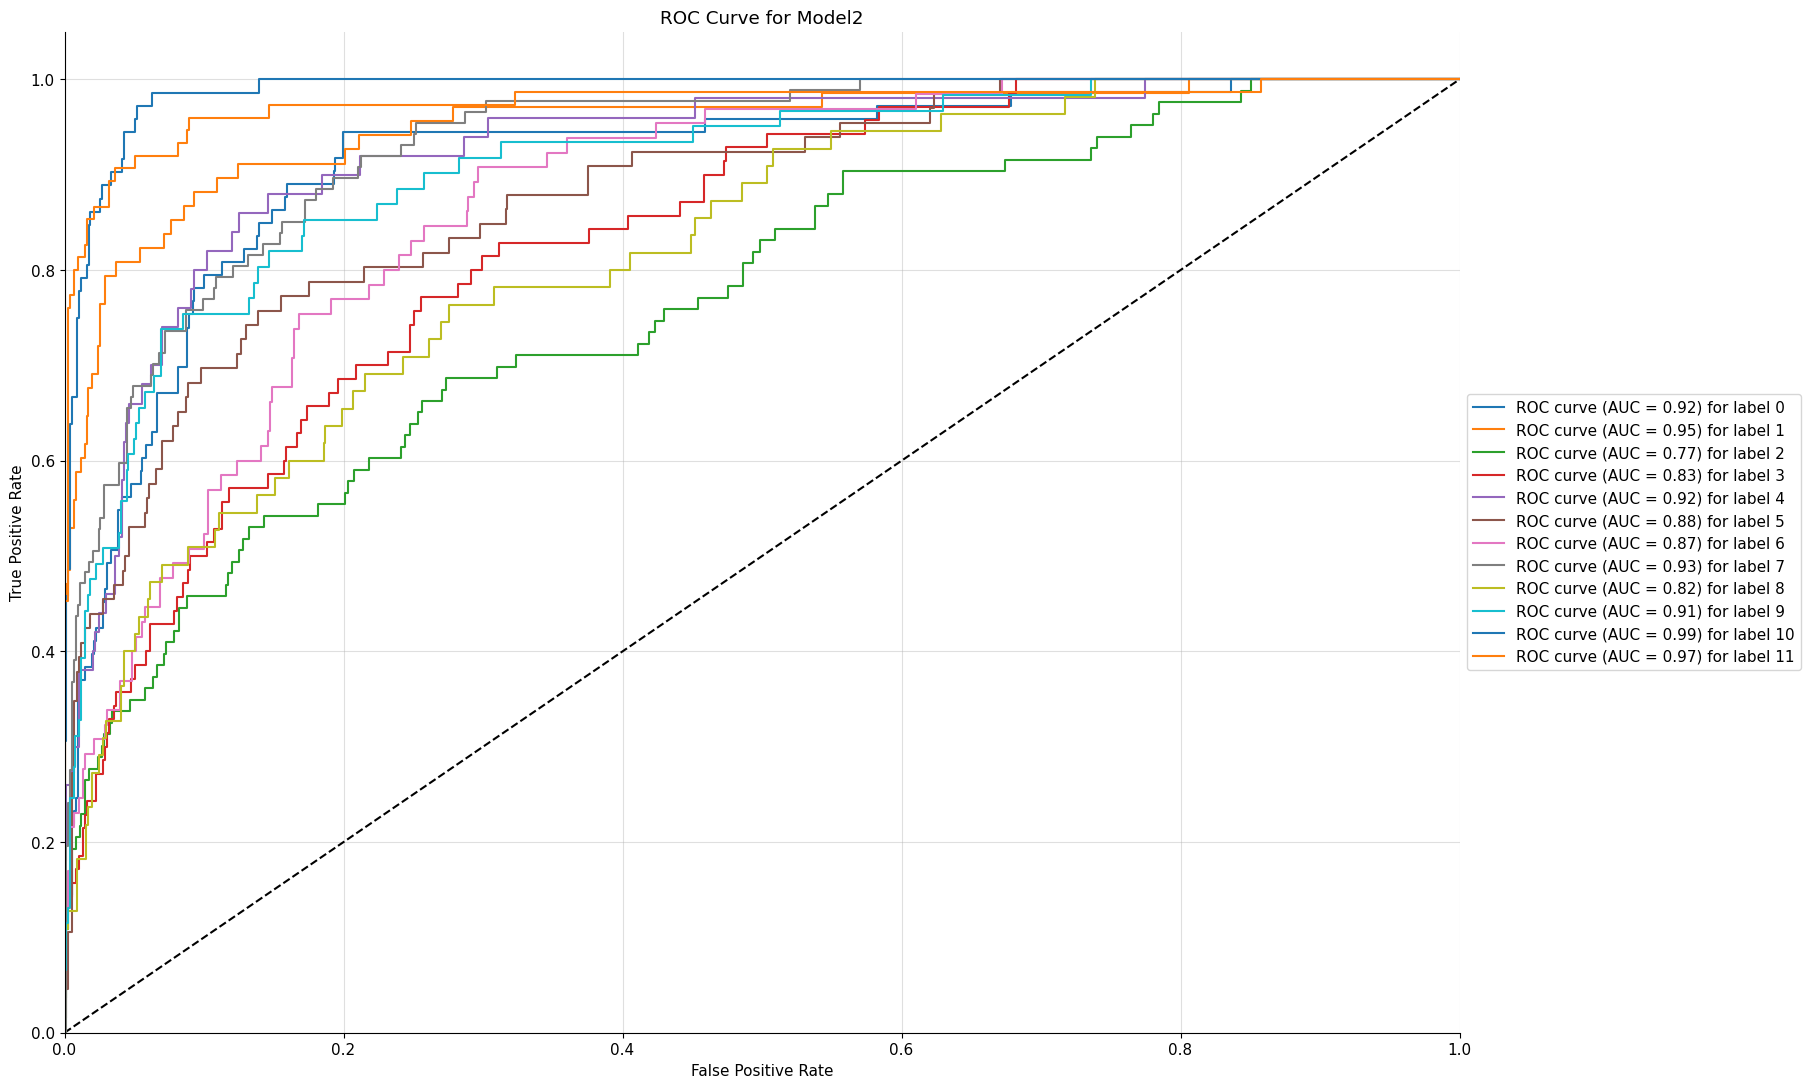

In [48]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(model_2, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = model_2.predict(test_generator, steps=len(test_generator), verbose=1)

    # 计算每个类别的ROC曲线和AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(12):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 绘制ROC曲线
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')

    for i in range(12):
        ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_roc_curve(model_2, test_generator, 'Model2')

In [55]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(test_generator, model_2, prediction_data_gen):
    # 使用模型进行预测
    predictions = model_2.predict(test_generator, steps=len(test_generator), verbose=1)
    
    # 获取预测类别
    preds = np.argmax(predictions, axis=1)
    
    # 获取真实标签
    labels = test_generator.classes
    
    # 获取类别名称
    names = np.array([i for i in validation_generator.class_indices.keys()])
    
    # 生成分类报告
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    
    # 将分类报告转换为DataFrame，并调整列名
    df = pd.DataFrame.from_dict(report_dict).transpose()
    
    return df

# 使用方式：
class_report(validation_generator, model_2, test_generator)

52/52 [==============================] - 1s 26ms/step


,precision,recall,f1-score,support
ants,0.652174,0.625000,0.638298,72.00000
bees,0.604396,0.833333,0.700637,66.00000
beetle,0.325000,0.203125,0.250000,64.00000
catterpillar,0.298246,0.298246,0.298246,57.00000
earthworms,0.625000,0.508475,0.560748,59.00000
earwig,0.456790,0.493333,0.474359,75.00000
grasshopper,0.505618,0.535714,0.520231,84.00000
moth,0.721311,0.564103,0.633094,78.00000
slug,0.193548,0.127660,0.153846,47.00000
snail,0.511364,0.625000,0.562500,72.00000


52/52 [==============================] - 1s 26ms/step


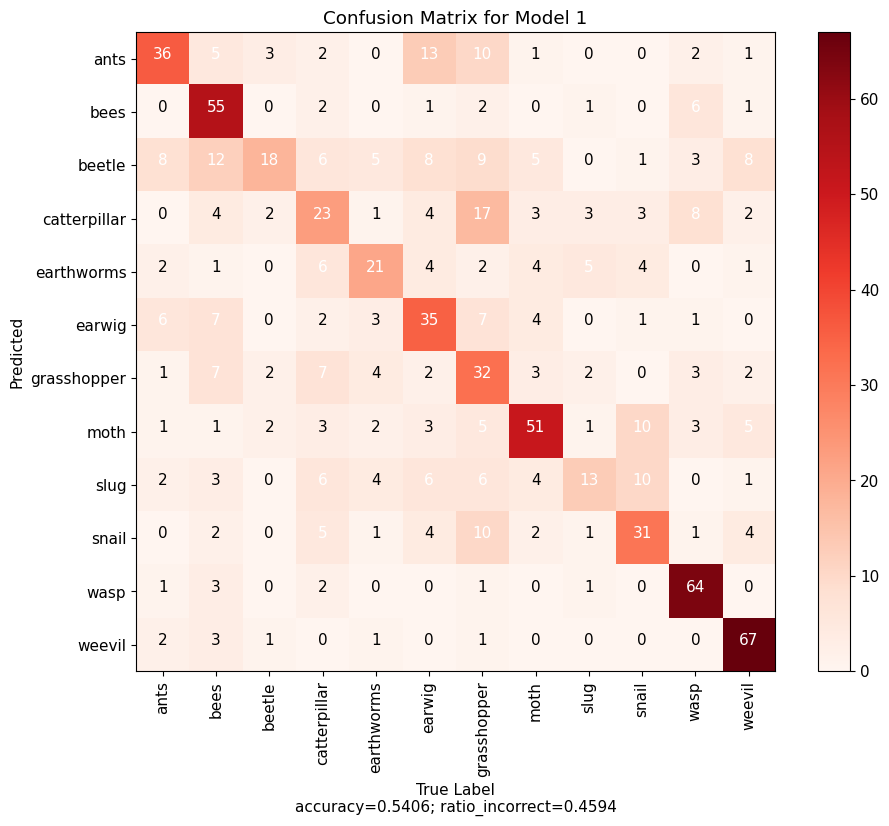

In [54]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(validation_generator, model_2, test_generator, model_name):
    plt.rcParams.update({'font.size': 11})
    
    # Use the correct number of steps for prediction
    predictions = model_2.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    predictions = tf.nn.softmax(predictions, axis=1)
    
    # Get true labels with the correct number of samples
    true_labels = []
    num_steps = len(test_generator)
    for i in range(num_steps):
        _, labels = test_generator[i]
        true_labels.extend(np.argmax(labels, axis=1))

    # Ensure the lengths match
    assert len(true_labels) == len(preds), "Inconsistent number of samples in true labels and predictions."
    
    plot_labels = np.array([i for i in validation_generator.class_indices.keys()])
    
    cm = confusion_matrix(true_labels, preds)

    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')
    
    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')
    
    plt.tight_layout()
    plt.ylabel('Predicted')
    plt.xlabel('True Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))

# Usage
plot_confusion_matrix(validation_generator, model_2, test_generator, 'Model 1')

In [16]:
# from tensorflow.keras.layers import Concatenate, Dense
# from tensorflow.keras.models import Model

# # 假设你有两个模型: model 和 model_2
# input_shape = (128, 128, 3)  # 根据你的需求调整输入形状
# num_classes = 12  # 根据你的任务调整类别数

# # 创建第一个模型
# model = create_se_resnet(input_shape, num_classes)

# # 创建第二个模型
# model_2 = create_model(input_shape, num_classes)

# # 为两个模型定义输入层
# input_1 = tf.keras.Input(shape=input_shape, name="model_1_input")
# input_2 = tf.keras.Input(shape=input_shape, name="model_2_input")

# # 获取第一个模型的输出
# output_1 = model(input_1)

# # 获取第二个模型的输出
# output_2 = model_2(input_2)

# # 使用`Concatenate`将两个模型的输出连接起来
# merged = Concatenate()([output_1, output_2])

# # 添加一个全连接层用于最终的预测
# ensemble_output = Dense(num_classes, activation='softmax', name="ensemble_output")(merged)

# # 创建集成模型
# ensemble_model = Model(inputs=[input_1, input_2], outputs=ensemble_output)

# # 编译集成模型
# ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # 显示集成模型的摘要
# ensemble_model.summary()


from keras.models import Model
from keras.layers import Input, Average

# Assuming model_2 and model are your previously defined models

# Input layer
input_layer = Input(shape=input_shape)

# Output of the first model (SEBlock-based model)
output_1 = model_2(input_layer)

# Output of the second model (SE-ResNet model)
output_2 = model(input_layer)

# Weighted average layer
# You can adjust the weights according to your preference
weighted_average = Average()([output_1, output_2])

# Create the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=weighted_average)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the ensemble model summary
ensemble_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 model_1 (Functional)        (None, 12)                   852568    ['input_5[0][0]']             
                                                                                                  
 model (Functional)          (None, 12)                   1269860   ['input_5[0][0]']             
                                                                                                  
 average (Average)           (None, 12)                   0         ['model_1[1][0]',             
                                                                     'model[0][0]']         

In [17]:
# Compile the model
from tensorflow.keras.optimizers import Adam

# 创建 Adam 优化器并设置学习率
custom_optimizer = Adam(learning_rate=0.0005)

# 编译模型
ensemble_model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:

history = ensemble_model.fit(train_generator, epochs=100, validation_data=validation_generator,verbose=2)

Epoch 1/100


2023-12-14 08:34:37.222387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-12-14 08:34:38.435948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-14 08:34:39.075798: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f025cbde4d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-14 08:34:39.075831: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-12-14 08:34:39.082170: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-14 08:34:39.232209: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

241/241 - 42s - loss: 2.4056 - accuracy: 0.1693 - val_loss: 2.4629 - val_accuracy: 0.1189 - 42s/epoch - 172ms/step
Epoch 2/100
241/241 - 24s - loss: 2.3244 - accuracy: 0.2070 - val_loss: 2.3253 - val_accuracy: 0.2112 - 24s/epoch - 101ms/step
Epoch 3/100
241/241 - 25s - loss: 2.2555 - accuracy: 0.2375 - val_loss: 2.3420 - val_accuracy: 0.2245 - 25s/epoch - 104ms/step
Epoch 4/100
241/241 - 24s - loss: 2.1740 - accuracy: 0.2676 - val_loss: 2.2350 - val_accuracy: 0.2549 - 24s/epoch - 101ms/step
Epoch 5/100
241/241 - 25s - loss: 2.1308 - accuracy: 0.2918 - val_loss: 2.2562 - val_accuracy: 0.2464 - 25s/epoch - 104ms/step
Epoch 6/100
241/241 - 24s - loss: 2.0691 - accuracy: 0.3202 - val_loss: 2.1944 - val_accuracy: 0.2573 - 24s/epoch - 101ms/step
Epoch 7/100
241/241 - 24s - loss: 2.0206 - accuracy: 0.3451 - val_loss: 1.9817 - val_accuracy: 0.3592 - 24s/epoch - 101ms/step
Epoch 8/100
241/241 - 25s - loss: 1.9809 - accuracy: 0.3646 - val_loss: 2.0152 - val_accuracy: 0.3362 - 25s/epoch - 104ms/s

In [19]:
test_loss_ensemble, test_acc_ensemble = ensemble_model.evaluate(test_generator)
print("ensemble_model Test accuracy:", test_acc_ensemble)
print("ensemble_model Test loss:", test_loss_ensemble)

52/52 [==============================] - 2s 46ms/step - loss: 1.7775 - accuracy: 0.5067
ensemble_model Test accuracy: 0.5066666603088379
ensemble_model Test loss: 1.7775189876556396


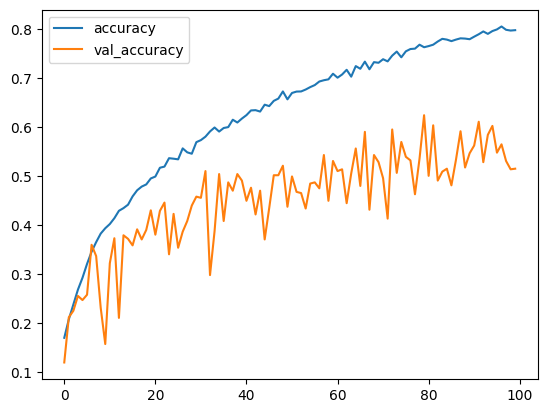

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

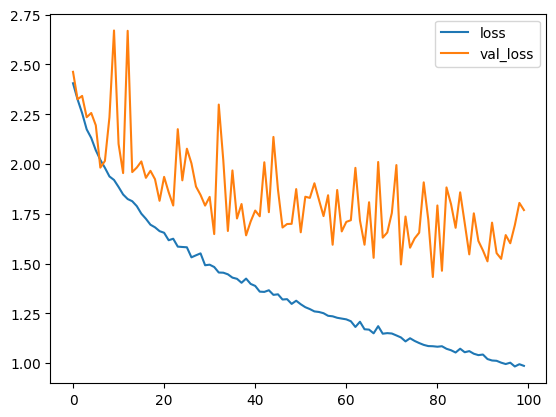

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

52/52 [==============================] - 2s 32ms/step


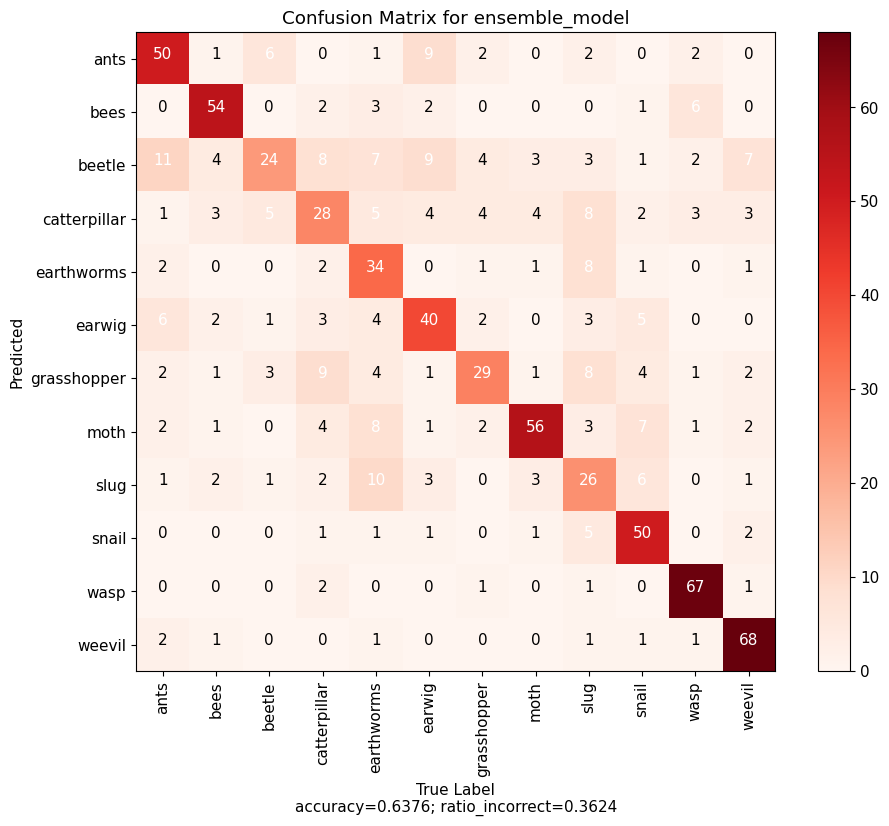

In [62]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(validation_generator, ensemble_model, test_generator, model_name):
    plt.rcParams.update({'font.size': 11})
    
    # Use the correct number of steps for prediction
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    predictions = tf.nn.softmax(predictions, axis=1)
    
    # Get true labels with the correct number of samples
    true_labels = []
    num_steps = len(test_generator)
    for i in range(num_steps):
        _, labels = test_generator[i]
        true_labels.extend(np.argmax(labels, axis=1))

    # Ensure the lengths match
    assert len(true_labels) == len(preds), "Inconsistent number of samples in true labels and predictions."
    
    plot_labels = np.array([i for i in validation_generator.class_indices.keys()])
    
    cm = confusion_matrix(true_labels, preds)

    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')
    
    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')
    
    plt.tight_layout()
    plt.ylabel('Predicted')
    plt.xlabel('True Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))

# Usage
plot_confusion_matrix(validation_generator, ensemble_model, test_generator, 'ensemble_model')

52/52 [==============================] - 2s 33ms/step


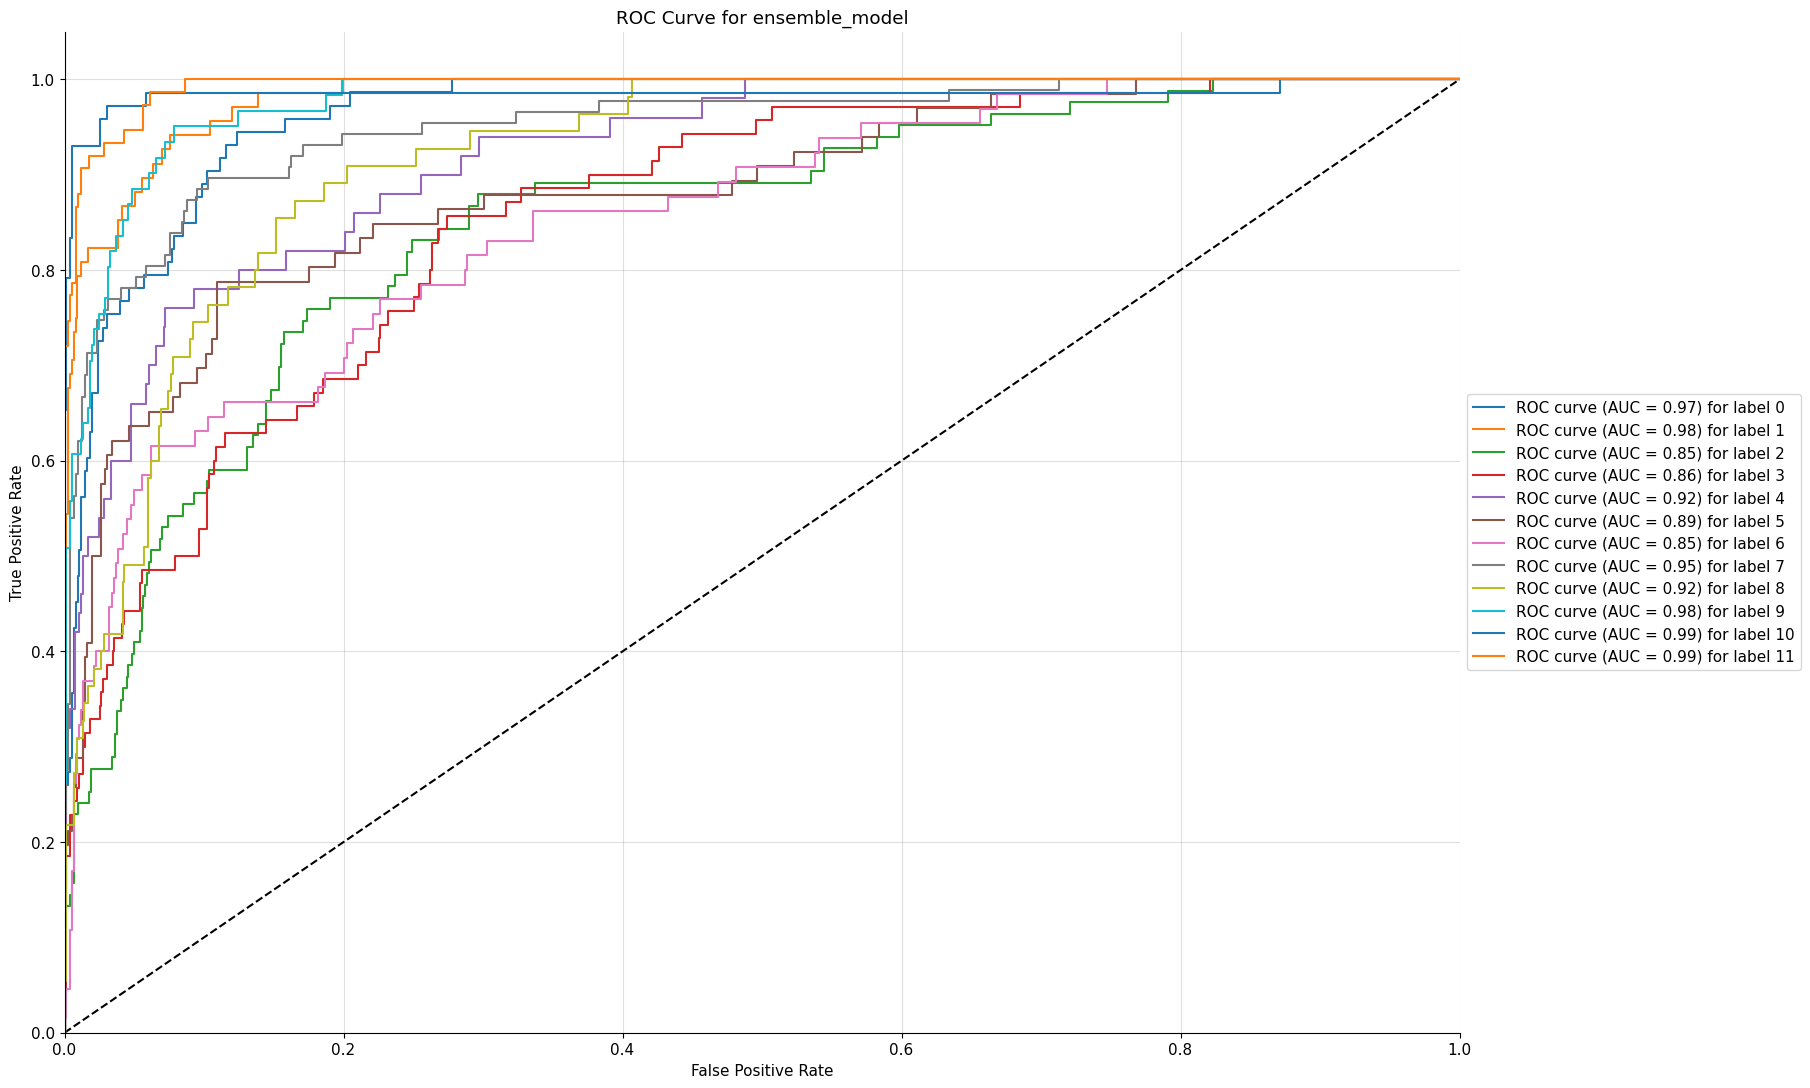

In [65]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(ensemble_model, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)

    # 计算每个类别的ROC曲线和AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(12):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 绘制ROC曲线
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')

    for i in range(12):
        ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_roc_curve(ensemble_model, test_generator, 'ensemble_model')

In [64]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(test_generator, ensemble_model, prediction_data_gen):
    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    
    # 获取预测类别
    preds = np.argmax(predictions, axis=1)
    
    # 获取真实标签
    labels = test_generator.classes
    
    # 获取类别名称
    names = np.array([i for i in validation_generator.class_indices.keys()])
    
    # 生成分类报告
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    
    # 将分类报告转换为DataFrame，并调整列名
    df = pd.DataFrame.from_dict(report_dict).transpose()
    
    return df

# 使用方式：
class_report(validation_generator, ensemble_model, test_generator)

52/52 [==============================] - 2s 32ms/step


,precision,recall,f1-score,support
ants,0.710843,0.819444,0.761290,72.000000
bees,0.828125,0.803030,0.815385,66.000000
beetle,0.534884,0.359375,0.429907,64.000000
catterpillar,0.350000,0.245614,0.288660,57.000000
earthworms,0.513158,0.661017,0.577778,59.000000
earwig,0.586667,0.586667,0.586667,75.000000
grasshopper,0.631579,0.428571,0.510638,84.000000
moth,0.887097,0.705128,0.785714,78.000000
slug,0.290323,0.382979,0.330275,47.000000
snail,0.652174,0.833333,0.731707,72.000000


52/52 [==============================] - 2s 33ms/step


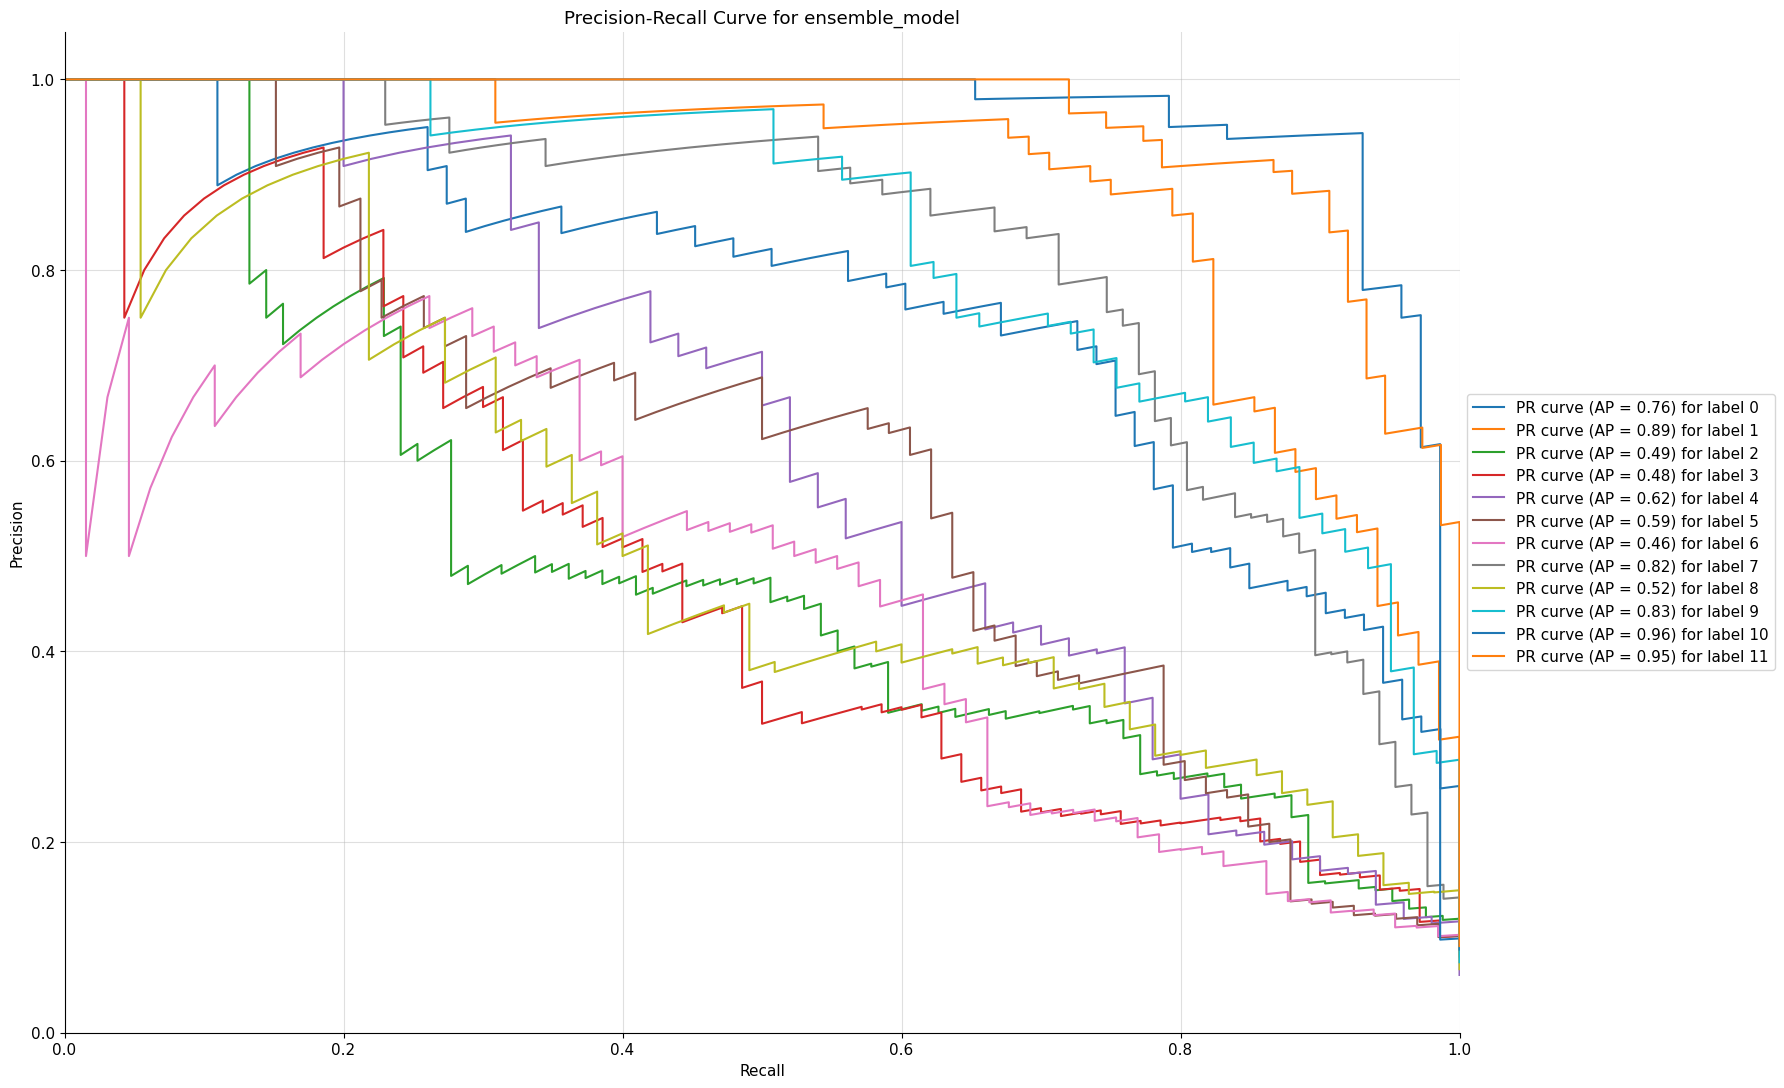

In [66]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(ensemble_model, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)

    # 初始化 Precision 和 Recall 字典
    precision = dict()
    recall = dict()
    average_precision = dict()

    # 计算每个类别的 Precision 和 Recall
    for i in range(12):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    # 绘制 Precision-Recall 曲线
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {model_name}')

    for i in range(12):
        ax.plot(recall[i], precision[i], label='PR curve (AP = %0.2f) for label %i' % (average_precision[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_precision_recall_curve(ensemble_model, test_generator, 'ensemble_model')

In [67]:
from sklearn.metrics import confusion_matrix
import pandas as pd

def sensitivity_specificity(ensemble_model, test_generator):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    y_pred = np.argmax(predictions, axis=1)

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 计算敏感性和特异性
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    # 创建DataFrame
    result_df = pd.DataFrame({
        'Metric': ['Sensitivity', 'Specificity'],
        'Value': [sensitivity, specificity]
    })

    return result_df

# 使用方式：
result_df = sensitivity_specificity(ensemble_model, test_generator)
print(result_df)

52/52 [==============================] - 2s 32ms/step
        Metric     Value
0  Sensitivity  1.000000
1  Specificity  0.980392


ModuleNotFoundError: No module named 'ensemlb_model'

In [1]:
pip install tf-explain

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras-vis

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [22]:
import cv2
import numpy as np
from keras.models import Model
from vis.visualization import visualize_cam
from vis.utils import utils
from matplotlib import pyplot as plt
import cv2
import numpy as np
from tf_keras_vis.gradcam import Gradcam
from matplotlib import pyplot as plt
# Load the example image
image_path = "data/ants/ants (1).jpg",
"data/bees/bees (1).jpg",
"data/beetle/beetle (1).jpg",
"data/catterpillar/catterpillar (1).jpg",
"data/earthworms/earthworms (1).jpg","data/earwig/earwig (1).jpg","data/grasshopper/grasshopper (1).jpg","data/moth/moth (1).jpg","data/slug/slug (1).jpg","data/snail/snail (1).jpg","data/wasp/WASP (1).jpg",
"data/weevil/Weevil (10).jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Preprocess the input image
preprocessed_image = preprocess_input(image)
# Create the Grad-CAM object
gradcam = Gradcam(model, layer_idx)
# Generate the heatmap
heatmap = gradcam.compute_heatmap(preprocessed_image)
# Overlay the heatmap onto the original image
overlay = cv2.addWeighted(image, 0.7, heatmap, 0.3, 0)
# Display the heatmap and the final image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(heatmap, cmap='jet')
plt.title('Heatmap')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title('Overlay')
plt.axis('off')
plt.tight_layout()
plt.show()

ImportError: cannot import name 'Iterable' from 'collections' (/environment/miniconda3/lib/python3.10/collections/__init__.py)